In [3]:
TRAIN_PATH = "C:/Users/lenovo/Downloads/CovidDataset-20200427T133042Z-001/CovidDataset/Train"
VAL_PATH = "C:/Users/lenovo/Downloads/CovidDataset-20200427T133042Z-001/CovidDataset/Val"


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [5]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [33]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    'C:/Users/lenovo/Downloads/CovidDataset-20200427T133042Z-001/CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [10]:
validation_generator = test_dataset.flow_from_directory(
    'C:/Users/lenovo/Downloads/CovidDataset-20200427T133042Z-001/CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [11]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=5,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps=2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
5/5 [==============================] - 239s 48s/step - loss: 0.7736 - accuracy: 0.5813 - val_loss: 0.6836 - val_accuracy: 0.6833
Epoch 2/20
5/5 [==============================] - 125s 25s/step - loss: 0.6622 - accuracy: 0.5875 - val_loss: 0.6299 - val_accuracy: 0.8667
Epoch 3/20
5/5 [==============================] - 35s 7s/step - loss: 0.4487 - accuracy: 0.8125 - val_loss: 0.3283 - val_accuracy: 0.9333
Epoch 4/20
5/5 [==============================] - 36s 7s/step - loss: 0.3523 - accuracy: 0.8625 - val_loss: 0.3702 - val_accuracy: 0.9333
Epoch 5/20
5/5 [==============================] - 53s 11s/step - loss: 0.2988 - accuracy: 0.8813 - val_loss: 0.2043 - val_accuracy: 0.9500
Epoch 6/20
5/5 [==============================] - 37s 7s/step - loss: 0.2435 - accuracy: 0.8875 - val_loss: 0.2946 - val_accuracy: 0.9667
Epoch 7/20
5/5 [==============================] - 36s 7s/step - loss: 0.2162 - accuracy: 0.

In [12]:
model.save("model_hdv.h5")

In [13]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.10348884761333466, 0.96875]

In [14]:
model.evaluate_generator(validation_generator)

[0.07402071356773376, 0.9666666388511658]

In [26]:
model=load_model('model_hdv.h5')

In [28]:
import os

In [29]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [40]:
y_actual=[]
y_test=[]

In [31]:
for i in os.listdir("C:/Users/lenovo/Downloads/CovidDataset-20200427T133042Z-001/CovidDataset/Val/Normal/"):
    img = image.load_img("C:/Users/lenovo/Downloads/CovidDataset-20200427T133042Z-001/CovidDataset/Val/Normal/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis = 0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

In [32]:
for i in os.listdir("C:/Users/lenovo/Downloads/CovidDataset-20200427T133042Z-001/CovidDataset/Val/Covid/"):
    img = image.load_img("C:/Users/lenovo/Downloads/CovidDataset-20200427T133042Z-001/CovidDataset/Val/Covid/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis = 0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)

In [33]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
cm=confusion_matrix(y_actual,y_test)

In [24]:
import seaborn as sns

<AxesSubplot:>

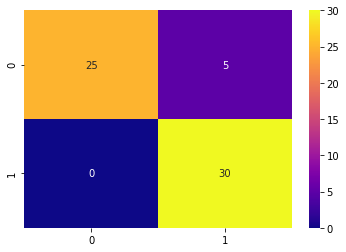

In [25]:
sns.heatmap(cm,cmap="plasma",annot=True)

In [ ]:
img = image.load_img(input("Input test image path:"))
img = image.img_to_array(img)
img = np.expand_dims(img,axis = 0)
p = model.predict_classes(img)
print(p[0,0])